In [16]:
dict_graph = {}


# Read the data.txt file
with open('romania_data.txt', 'r') as f:
    for l in f:
        city_a, city_b, p_cost = l.split()
        if city_a not in dict_graph:
            dict_graph[city_a] = {}
        dict_graph[city_a][city_b] = int(p_cost)
        if city_b not in dict_graph:
            dict_graph[city_b] = {}
        dict_graph[city_b][city_a] = int(p_cost)

In [17]:
# Breadth First Search Method
def BreadthFirstSearch(graph, src, dst):
    q = [(src, [src], 0)]
    visited = {src}
    while q:
        (node, path, cost) = q.pop(0)
        for temp in graph[node].keys():
            if temp == dst:
                return path + [temp], cost + graph[node][temp]
            else:
                if temp not in visited:
                    visited.add(temp)
                    q.append((temp, path + [temp], cost + graph[node][temp]))

In [18]:
# start state name
src="Arad"
# distination state name
dst="Bucharest"
while src not in dict_graph or dst not in dict_graph:
    print ("No such city name")
    src = raw_input("Enter the correct source (case_sensitive):\n")
    dst = raw_input("Enter the correct destination(case_sensitive):\n ")
print ("for BFS")
nodes,cost=BreadthFirstSearch(dict_graph, src, dst)
print (f"Traverse cites {nodes}")
print(f"Total cost {cost}")
costs_list=[]
nodes_list=[]
costs_list.append(cost)
nodes_list.append(len(nodes))

for BFS
Traverse cites ['Arad', 'Sibiu', 'Fagaras', 'Bucharest']
Total cost 450


In [19]:
# Depth First Search Method
def DepthFirstSearch(graph, src, dst):
    stack = [(src, [src], 0)]
    visited = {src}
    while stack:
        (node, path, cost) = stack.pop()
        for temp in graph[node].keys():
            if temp == dst:
                return path + [temp], cost + graph[node][temp]
            else:
                if temp not in visited:
                    visited.add(temp)
                    stack.append((temp, path + [temp], cost + graph[node][temp]))

In [20]:
# start state name
src="Arad"
# distination state name
dst="Bucharest"
while src not in dict_graph or dst not in dict_graph:
    print ("No such city name")
    src = raw_input("Enter the correct source (case_sensitive):\n")
    dst = raw_input("Enter the correct destination(case_sensitive):\n ")
print ("for DFS")
nodes,cost=DepthFirstSearch(dict_graph, src, dst)
print (f"Traverse cites {nodes}")
print(f"Total cost {cost}")
costs_list.append(cost)
nodes_list.append(len(nodes))


for DFS
Traverse cites ['Arad', 'Timisoara', 'Lugoj', 'Mehadia', 'Drobeta', 'Craiova', 'Piteshi', 'Bucharest']
Total cost 733


In [21]:
# Iterative Deepening Search Method
def IterativeDeepening(graph, src, dst):
    level = 0
    count = 0
    stack = [(src, [src], 0)]
    visited = {src}
    while True:
        level += 1
        while stack:
            if count <= level:
                count = 0
                (node, path, cost) = stack.pop()
                for temp in graph[node].keys():
                    if temp == dst:
                        return path + [temp], cost + graph[node][temp]
                    else:
                        if temp not in visited:
                            visited.add(temp)
                            count += 1
                            stack.append((temp, path + [temp], cost + graph[node][temp]))
            else:
                q = stack
                visited_bfs = {src}
                while q:
                    (node, path, cost) = q.pop(0)
                    for temp in graph[node].keys():
                        if temp == dst:
                            return path + [temp], cost + graph[node][temp]
                        else:
                            if temp not in visited_bfs:
                                visited_bfs.add(temp)
                                q.append((temp, path + [temp], cost + graph[node][temp]))
                break

In [22]:
# start state name
src="Arad"
# distination start name
dst="Bucharest"
while src not in dict_graph or dst not in dict_graph:
    print ("No such city name")
    src = raw_input("Enter the correct source (case_sensitive):\n")
    dst = raw_input("Enter the correct destination(case_sensitive):\n ")
print ("for Iterative deepning")
nodes,cost=IterativeDeepening(dict_graph, src, dst)
print (f"Traverse cites {nodes}")
print(f"Total cost {cost}")
costs_list.append(cost)
nodes_list.append(len(nodes))

for Iterative deepning
Traverse cites ['Arad', 'Sibiu', 'Fagaras', 'Bucharest']
Total cost 450


In [23]:
"""
Uniform Cost Search Implementation using PriorityQueue

Map and input taken from
http://www.massey.ac.nz/~mjjohnso/notes/59302/l04.html

"""

import queue as Q

def search(graph, start, end):
    if start not in graph:
        raise TypeError(str(start) + ' not found in graph !')
        return
    if end not in graph:
        raise TypeError(str(end) + ' not found in graph !')
        return
    
    queue = Q.PriorityQueue()
    queue.put((0, [start]))
    
    while not queue.empty():
        node = queue.get()
        current = node[1][len(node[1]) - 1]
        
        if end in node[1]:
            print("Path found: " + str(node[1]) + ", Cost = " + str(node[0]))
            costs_list.append(node[0])
            nodes_list.append(len(node[1]))
            break
        
        cost = node[0]
        for neighbor in graph[current]:
            temp = node[1][:]
            temp.append(neighbor)
            queue.put((cost + graph[current][neighbor], temp))
        
def readGraph():
    lines = int( input() )
    graph = {}
    
    for line in range(lines):
        line = input()
            
        tokens = line.split()
        node = tokens[0]
        graph[node] = {}
        
        for i in range(1, len(tokens) - 1, 2):
            # print(node, tokens[i], tokens[i + 1])
            # graph.addEdge(node, tokens[i], int(tokens[i + 1]))
            graph[node][tokens[i]] = int(tokens[i + 1])
    return graph


graph = readGraph()

search(graph, 'Arad', 'Bucharest')

"""
Sample Map Input:

14
Arad Zerind 75 Timisoara 118 Sibiu 140
Zerind Oradea 71 Arad 75
Timisoara Arad 118 Lugoj 111
Sibiu Arad 140 Oradea 151 Fagaras 99 RimnicuVilcea 80
Oradea Zerind 71 Sibiu 151
Lugoj Timisoara 111 Mehadia 70
RimnicuVilcea Sibiu 80 Pitesti 97 Craiova 146
Mehadia Lugoj 70 Dobreta 75
Craiova Dobreta 120 RimnicuVilcea 146 Pitesti 138
Pitesti RimnicuVilcea 97 Craiova 138 Bucharest 101
Fagaras Sibiu 99 Bucharest 211
Dobreta Mehadia 75 Craiova 120
Bucharest Fagaras 211 Pitesti 101 Giurgiu 90
Giurgiu Bucharest 90
"""

14
Arad Zerind 75 Timisoara 118 Sibiu 140
Zerind Oradea 71 Arad 75
Timisoara Arad 118 Lugoj 111
Sibiu Arad 140 Oradea 151 Fagaras 99 RimnicuVilcea 80
Oradea Zerind 71 Sibiu 151
Lugoj Timisoara 111 Mehadia 70
RimnicuVilcea Sibiu 80 Pitesti 97 Craiova 146
Mehadia Lugoj 70 Dobreta 75
Craiova Dobreta 120 RimnicuVilcea 146 Pitesti 138
Pitesti RimnicuVilcea 97 Craiova 138 Bucharest 101
Fagaras Sibiu 99 Bucharest 211
Dobreta Mehadia 75 Craiova 120
Bucharest Fagaras 211 Pitesti 101 Giurgiu 90
Giurgiu Bucharest 90
Path found: ['Arad', 'Sibiu', 'RimnicuVilcea', 'Pitesti', 'Bucharest'], Cost = 418


'\nSample Map Input:\n\n14\nArad Zerind 75 Timisoara 118 Sibiu 140\nZerind Oradea 71 Arad 75\nTimisoara Arad 118 Lugoj 111\nSibiu Arad 140 Oradea 151 Fagaras 99 RimnicuVilcea 80\nOradea Zerind 71 Sibiu 151\nLugoj Timisoara 111 Mehadia 70\nRimnicuVilcea Sibiu 80 Pitesti 97 Craiova 146\nMehadia Lugoj 70 Dobreta 75\nCraiova Dobreta 120 RimnicuVilcea 146 Pitesti 138\nPitesti RimnicuVilcea 97 Craiova 138 Bucharest 101\nFagaras Sibiu 99 Bucharest 211\nDobreta Mehadia 75 Craiova 120\nBucharest Fagaras 211 Pitesti 101 Giurgiu 90\nGiurgiu Bucharest 90\n'

In [24]:
nodes_list

[4, 8, 4, 5]

In [25]:
# costs_list[-1]=len(costs_list[-1])
costs_list

[450, 733, 450, 418]

In [27]:
GRAPH = {\
            'Arad': {'Sibiu': 140, 'Zerind': 75, 'Timisoara': 118},\
            'Zerind': {'Arad': 75, 'Oradea': 71},\
            'Oradea': {'Zerind': 71, 'Sibiu': 151},\
            'Sibiu': {'Arad': 140, 'Oradea': 151, 'Fagaras': 99, 'Rimnicu': 80},\
            'Timisoara': {'Arad': 118, 'Lugoj': 111},\
            'Lugoj': {'Timisoara': 111, 'Mehadia': 70},\
            'Mehadia': {'Lugoj': 70, 'Drobeta': 75},\
            'Drobeta': {'Mehadia': 75, 'Craiova': 120},\
            'Craiova': {'Drobeta': 120, 'Rimnicu': 146, 'Pitesti': 138},\
            'Rimnicu': {'Sibiu': 80, 'Craiova': 146, 'Pitesti': 97},\
            'Fagaras': {'Sibiu': 99, 'Bucharest': 211},\
            'Pitesti': {'Rimnicu': 97, 'Craiova': 138, 'Bucharest': 101},\
            'Bucharest': {'Fagaras': 211, 'Pitesti': 101, 'Giurgiu': 90, 'Urziceni': 85},\
            'Giurgiu': {'Bucharest': 90},\
            'Urziceni': {'Bucharest': 85, 'Vaslui': 142, 'Hirsova': 98},\
            'Hirsova': {'Urziceni': 98, 'Eforie': 86},\
            'Eforie': {'Hirsova': 86},\
            'Vaslui': {'Iasi': 92, 'Urziceni': 142},\
            'Iasi': {'Vaslui': 92, 'Neamt': 87},\
            'Neamt': {'Iasi': 87}\
        }



def a_star(source, destination):
    """Optimal path from source to destination using straight line distance heuristic
    :param source: Source city name
    :param destination: Destination city name
    :returns: Heuristic value, cost and path for optimal traversal
    """
    # HERE THE STRAIGHT LINE DISTANCE VALUES ARE IN REFERENCE TO BUCHAREST AS THE DESTINATION
    straight_line = {\
                        'Arad': 366,\
                        'Zerind': 374,\
                        'Oradea': 380,\
                        'Sibiu': 253,\
                        'Timisoara': 329,\
                        'Lugoj': 244,\
                        'Mehadia': 241,\
                        'Drobeta': 242,\
                        'Craiova': 160,\
                        'Rimnicu': 193,\
                        'Fagaras': 176,\
                        'Pitesti': 100,\
                        'Bucharest': 0,\
                        'Giurgiu': 77,\
                        'Urziceni': 80,\
                        'Hirsova': 151,\
                        'Eforie': 161,\
                        'Vaslui': 199,\
                        'Iasi': 226,\
                        'Neamt': 234\
                    }
    from queue import PriorityQueue
    priority_queue, visited = PriorityQueue(), {}
    priority_queue.put((straight_line[source], 0, source, [source]))
    visited[source] = straight_line[source]
    while not priority_queue.empty():
        (heuristic, cost, vertex, path) = priority_queue.get()
        if vertex == destination:
            return heuristic, cost, path
        for next_node in GRAPH[vertex].keys():
            current_cost = cost + GRAPH[vertex][next_node]
            heuristic = current_cost + straight_line[next_node]
            if not next_node in visited or visited[next_node] >= heuristic:
                visited[next_node] = heuristic
                priority_queue.put((heuristic, current_cost, next_node, path + [next_node]))

# def main():
"""Main function"""
print('ENTER SOURCE :', end=' ')
source = 'Arad'
#     print('ENTER GOAL :', end=' ')
goal = 'Bucharest'
if source not in GRAPH or goal not in GRAPH:
    print('ERROR: CITY DOES NOT EXIST.')
else:
    heuristic, cost, optimal_path = a_star(source, goal)
    print('HEURISTIC =', heuristic)
    print('PATH COST =', cost)
    print(' -> '.join(optimal_path))
costs_list.append(cost)
nodes_list.append(len(optimal_path))

# if __name__ == '__main__':
# main()

ENTER SOURCE : HEURISTIC = 418
PATH COST = 418
Arad -> Sibiu -> Rimnicu -> Pitesti -> Bucharest


In [28]:
nodes_list

[4, 8, 4, 5, 5]

In [29]:
costs_list

[450, 733, 450, 418, 418]

In [30]:
import pandas as pd


In [31]:
df=pd.DataFrame(
    {
        "search_algo":['Depth first search','Breadth first search','Iterative deepening','Uniform cost search','A*'],
        "Travers_node":nodes_list,
        "total_cost":costs_list
    }
)

In [32]:
df

,search_algo,Travers_node,total_cost
0,Depth first search,4,450
1,Breadth first search,8,733
2,Iterative deepening,4,450
3,Uniform cost search,5,418
4,A*,5,418


In [33]:
import matplotlib.pyplot as plt

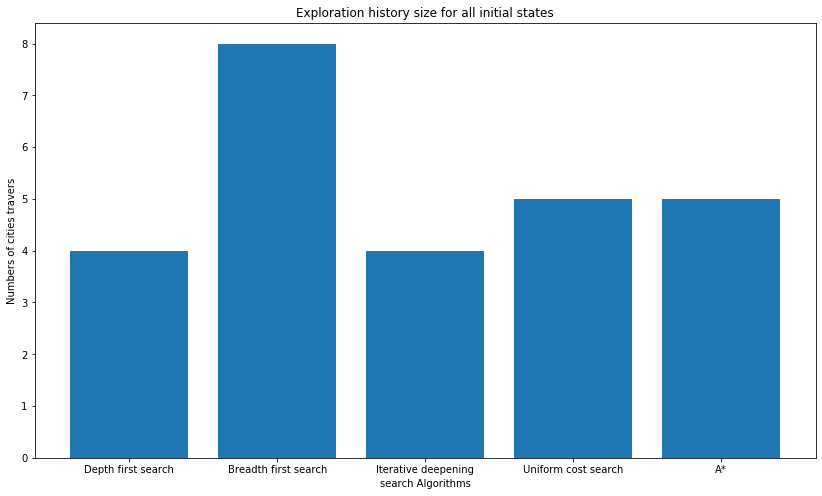

In [38]:
plt.figure(figsize=(14,8))
plt.bar(df.search_algo,df.Travers_node)
plt.title("Exploration history size for all initial states")
plt.xlabel("search Algorithms")
plt.ylabel("Numbers of cities travers")
plt.show()

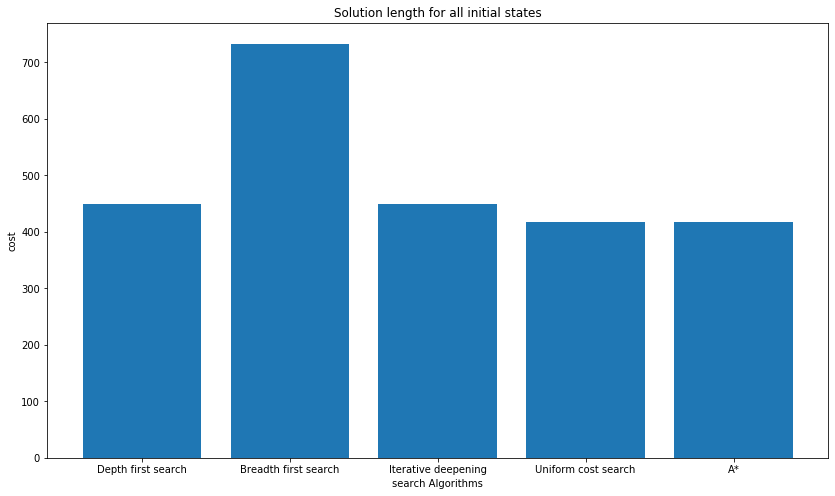

In [41]:
plt.figure(figsize=(14,8))
plt.bar(df.search_algo,df.total_cost)
plt.title("Solution length for all initial states")
plt.xlabel("search Algorithms")
plt.ylabel("cost")
plt.show()

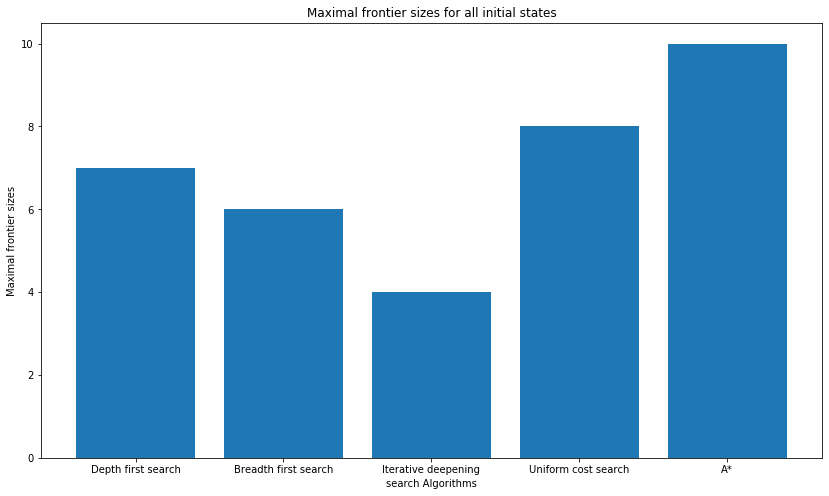

In [42]:
plt.figure(figsize=(14,8))
plt.bar(df.search_algo,[7,6,4,8,10])
plt.title("Maximal frontier sizes for all initial states")
plt.xlabel("search Algorithms")
plt.ylabel("Maximal frontier sizes")
plt.show()